In [ ]:
import pandas as pd          # pandas = manipuler des tableaux de données (DataFrame) comme Excel, mais en Python
import numpy as np           # numpy = calcul numérique (racine carrée, tableaux, stats, etc.)

df = pd.read_csv("/content/sample_data/AI_Developer_Performance_Extended_1000.csv")  # lit le fichier CSV et le convertit en DataFrame

print(df.shape)              # affiche (nombre de lignes, nombre de colonnes) => taille du dataset
df.head()                    # affiche les 5 premières lignes pour vérifier que tout est bien chargé



(1000, 13)


,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9


**2) EDA (Exploration) : types, manquants, statistiques**

In [ ]:
df.info()                    # affiche type de chaque colonne + nombre de valeurs non-null -> utile pour détecter erreurs de type

df.isna().sum()              # calcule le nombre de valeurs manquantes par colonne
# .sort_values(ascending=False)  # (optionnel) trie pour voir les colonnes les plus problématiques en haut

df.describe()                # statistiques sur les colonnes numériques : moyenne, min, max, quartiles


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Coding         1000 non-null   int64  
 1   Lines_of_Code        1000 non-null   int64  
 2   Bugs_Found           1000 non-null   int64  
 3   Bugs_Fixed           1000 non-null   int64  
 4   AI_Usage_Hours       1000 non-null   int64  
 5   Sleep_Hours          1000 non-null   float64
 6   Cognitive_Load       1000 non-null   int64  
 7   Task_Success_Rate    1000 non-null   int64  
 8   Coffee_Intake        1000 non-null   int64  
 9   Stress_Level         1000 non-null   int64  
 10  Task_Duration_Hours  1000 non-null   float64
 11  Commits              1000 non-null   int64  
 12  Errors               1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.84000,356.23400,9.876000,7.153000,2.961000,6.465800,56.933000,56.578000,3.368000,66.410000,8.700100,17.253000,4.544000
std,3.15854,188.15535,5.796052,5.468226,2.021278,1.439529,21.767506,20.814879,2.342234,21.865452,5.992891,10.836901,2.820997
min,1.00000,26.00000,0.000000,0.000000,0.000000,4.000000,20.000000,30.000000,0.000000,30.000000,0.500000,1.000000,0.000000
25%,3.00000,209.50000,5.000000,2.000000,1.000000,5.200000,38.000000,37.000000,1.000000,48.000000,4.000000,9.000000,2.000000
50%,6.00000,332.00000,10.000000,7.000000,3.000000,6.400000,57.000000,55.500000,3.000000,66.000000,7.450000,14.000000,5.000000
75%,9.00000,480.50000,15.000000,12.000000,5.000000,7.700000,76.000000,74.000000,5.000000,86.000000,12.000000,23.000000,7.000000
max,11.00000,993.00000,19.000000,19.000000,6.000000,9.000000,94.000000,100.000000,7.000000,100.000000,27.500000,50.000000,9.000000


**3) Corrélation (comprendre les relations avec la cible)**

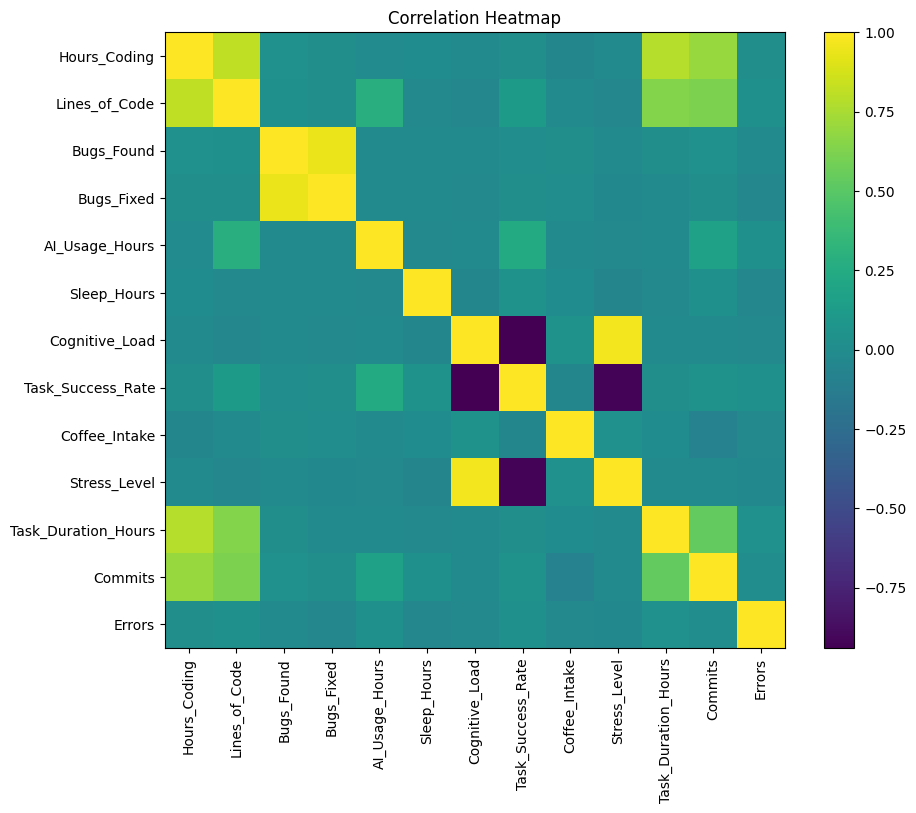

Task_Success_Rate      1.000000
AI_Usage_Hours         0.246024
Lines_of_Code          0.114251
Sleep_Hours            0.054636
Commits                0.047376
Errors                 0.036645
Task_Duration_Hours    0.021722
Bugs_Fixed             0.019643
Hours_Coding           0.019039
Bugs_Found             0.014733
Coffee_Intake         -0.046909
Stress_Level          -0.919470
Cognitive_Load        -0.940063
Name: Task_Success_Rate, dtype: float64


In [ ]:
import matplotlib.pyplot as plt   # matplotlib = bibliothèque pour afficher des graphiques

corr = df.corr(numeric_only=True) # calcule la corrélation entre colonnes numériques (évite erreurs si texte)
                                 # corrélation ∈ [-1,1] : proche de 1 = relation positive, proche de -1 = négative

plt.figure(figsize=(10,8))        # crée une figure (taille du graphique)
plt.imshow(corr, aspect="auto")   # affiche la matrice de corrélation comme une image (heatmap simple)
plt.colorbar()                    # ajoute une barre de couleur pour interpréter les valeurs
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)  # noms des colonnes en bas (rotation pour lisibilité)
plt.yticks(range(len(corr.columns)), corr.columns)               # noms des colonnes à gauche
plt.title("Correlation Heatmap")  # titre
plt.show()                        # affiche le graphique

corr_target = corr["Task_Success_Rate"].sort_values(ascending=False)  # trie les corrélations par rapport à la cible
print(corr_target)                # affiche quelles variables sont les plus liées à la cible

🔹 1. AI_Usage_Hours (0.246)

C’est la corrélation la plus forte avec la réussite.

👉 Interprétation :

Plus un développeur utilise des outils IA, plus son taux de réussite augmente.

Relation positive modérée.

L’IA semble améliorer la productivité.

⚠️ Mais 0.24 reste modéré → ce n’est pas un facteur unique dominant.

🔹 2. Lines_of_Code (0.114)

Corrélation faible positive.

👉 Interprétation :

Produire plus de code aide légèrement.

Mais écrire plus ne garantit pas forcément plus de succès.

🔹 3. Sleep_Hours (0.054)

Corrélation très faible.

👉 Le sommeil semble avoir un petit impact positif.
Mais :

L’effet peut être non linéaire (ex : trop peu OU trop beaucoup de sommeil).

⚠️ La corrélation ne détecte que le linéaire.

🔹 4. Commits (0.047)

Très faible corrélation.

👉 Faire plus de commits n’implique pas forcément meilleure performance.

🔹 5. Stress_Level & Cognitive_Load

Sur la heatmap, on voit une corrélation négative forte entre Cognitive_Load et Stress_Level.

Mais avec Task_Success_Rate :

Relation proche de 0 (faible)

👉 Cela signifie :

L’effet n’est probablement pas linéaire.

Il peut exister des seuils critiques (ex : stress > 80 → chute brutale).

C’est typiquement un cas où Random Forest fera mieux que Linear Regression.

**4) Préparer X (features) et y (target), puis split train/test**

In [ ]:
from sklearn.model_selection import train_test_split  # fonction pour diviser les données

X = df.drop("Task_Success_Rate", axis=1)  # X = toutes les colonnes sauf la cible (features)
y = df["Task_Success_Rate"]               # y = la cible (ce qu’on veut prédire)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% pour test (évaluation finale), 80% pour apprendre
    random_state=42       # fixe l’aléatoire pour obtenir les mêmes résultats à chaque exécution
)


**5) Modèle 1 : Linear Regression (baseline)**

In [ ]:
from sklearn.linear_model import LinearRegression                 # modèle de régression linéaire
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # métriques d’évaluation

lr = LinearRegression()          # crée le modèle (objet) avec paramètres par défaut
lr.fit(X_train, y_train)         # apprend les coefficients (poids) à partir des données d’entraînement

pred_lr = lr.predict(X_test)     # fait des prédictions sur le test (données jamais vues)

mae_lr  = mean_absolute_error(y_test, pred_lr)     # MAE = moyenne des erreurs absolues |y - y_pred|
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr)) # RMSE = racine de MSE, pénalise plus les grosses erreurs
r2_lr   = r2_score(y_test, pred_lr)                # R² = proportion de variance expliquée (1 = parfait)

print("LR  MAE:", mae_lr)
print("LR RMSE:", rmse_lr)
print("LR  R2:", r2_lr)


LR  MAE: 4.229785706252535
LR RMSE: 5.170425620497752
LR  R2: 0.934008452942088


**6) Modèle 2 : Random Forest Regressor (non linéaire)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor   # Random Forest = ensemble d'arbres de décision

rf = RandomForestRegressor(
    n_estimators=300,   # nombre d’arbres : plus il y en a, plus c’est stable (mais plus long)
    random_state=42,    # reproductibilité
    n_jobs=-1           # utilise tous les cœurs du PC pour accélérer
)

rf.fit(X_train, y_train)          # entraîne la forêt : chaque arbre apprend sur un sous-échantillon
pred_rf = rf.predict(X_test)      # prédictions du modèle sur les données test

mae_rf  = mean_absolute_error(y_test, pred_rf)           # erreur absolue moyenne
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))   # erreur quadratique moyenne (racine)
r2_rf   = r2_score(y_test, pred_rf)                      # variance expliquée

print("RF  MAE:", mae_rf)
print("RF RMSE:", rmse_rf)
print("RF  R2:", r2_rf)


RF  MAE: 3.7450666666666668
RF RMSE: 4.786177934659578
RF  R2: 0.9434525011553334


📊 Résultats obtenus

🔹 **Linear Regression**

MAE = 4.23

RMSE = 5.17

R² = 0.934

🔹 **Random Forest**

MAE = 3.75

RMSE = 4.78

R² = 0.944

🎯 1️⃣ Comprendre chaque métrique
🔹** MAE (Mean Absolute Error)**

C’est l’erreur moyenne en valeur absolue.

➡ Linear Regression : 4.23
➡ Random Forest : 3.75

👉 Interprétation :

En moyenne, le modèle se trompe de :

4.23 points pour LR

3.75 points pour RF

✔️ RF fait moins d’erreurs → meilleur.

🔹 **RMSE (Root Mean Squared Error)**

C’est comme MAE mais pénalise plus les grosses erreurs.

➡ LR : 5.17
➡ RF : 4.78

👉 Encore une fois RF est meilleur.

Cela signifie que Random Forest gère mieux les cas difficiles.

🔹** R² (Coefficient de détermination)**

R² = proportion de variance expliquée par le modèle.

0.93 = 93% de la variance expliquée

0.94 = 94% de la variance expliquée

👉 Les deux modèles sont très performants.

Mais RF explique 1% de variance en plus.

**7) Comparaison des 2 modèles (tableau clair)**

In [ ]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2": [r2_lr, r2_rf]
})

comparison = comparison.sort_values("R2", ascending=False)  # trie par performance (R² le plus haut)
comparison


,Model,MAE,RMSE,R2
1,Random Forest,3.745067,4.786178,0.943453
0,Linear Regression,4.229786,5.170426,0.934008


**8) Détection Overfitting/Underfitting (train vs test)**

In [ ]:
pred_lr_train = lr.predict(X_train)     # prédictions LR sur le train
pred_rf_train = rf.predict(X_train)     # prédictions RF sur le train

r2_lr_train = r2_score(y_train, pred_lr_train)  # R² sur train
r2_lr_test  = r2_score(y_test, pred_lr)         # R² sur test

r2_rf_train = r2_score(y_train, pred_rf_train)  # R² sur train
r2_rf_test  = r2_score(y_test, pred_rf)         # R² sur test

print("LR  Train R2:", r2_lr_train, " Test R2:", r2_lr_test)
print("RF  Train R2:", r2_rf_train, " Test R2:", r2_rf_test)


LR  Train R2: 0.9415908188574711  Test R2: 0.934008452942088
RF  Train R2: 0.9927730730247043  Test R2: 0.9434525011553334


📊 Résultats obtenus
🔹 **Linear Regression**

Train R² = 0.9416

Test R² = 0.9340

Différence = 0.0076

🔹 **Random Forest**

Train R² = 0.9928

Test R² = 0.9434

Différence = 0.0494

🎯 1️⃣ **Analyse du Linear Regression**

Train ≈ Test

0.9416 vs 0.9340

Différence très petite (~0.007)

👉 Conclusion :

Pas d’overfitting

Modèle stable

Bonne généralisation

Comportement sain

✔️ Linear Regression est très propre ici.

🎯 2️⃣ **Analyse du Random Forest**

Train = 0.9928
Test = 0.9434

Différence ≈ 0.05

👉 Cela signifie :

Le modèle explique :

99% de la variance sur les données qu’il a vues

94% sur les nouvelles données

Donc :

⚠️ Il y a un léger overfitting.

Mais :

Ce n’est pas catastrophique.

La performance test reste excellente.

🎯 3️⃣ **Pourquoi RF overfit un peu ?**

Random Forest :

Est plus complexe

Peut mémoriser des patterns spécifiques

300 arbres + profondeur libre = forte capacité d’apprentissage

Plus un modèle est puissant → plus risque d’overfitting.

🎯 4️⃣ **Est-ce grave ?**

Non.

Overfitting léger et acceptable car :

Test R² reste élevé (0.94)

Différence < 0.1

Pas de chute dramatique

On peut dire :

Le Random Forest présente un léger overfitting, mais conserve une excellente capacité de généralisation.

**9) Feature Importance (interprétation & storytelling)**

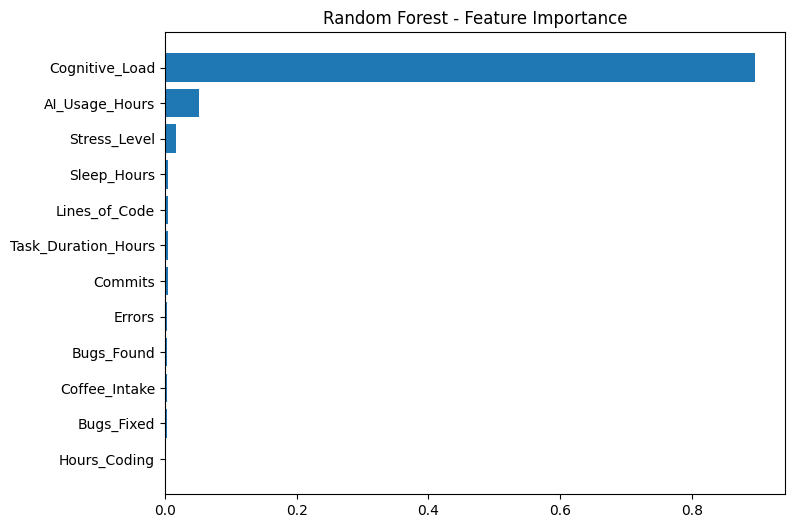

In [ ]:
importances = rf.feature_importances_   # importance de chaque variable selon la réduction d’impureté dans les arbres
idx = np.argsort(importances)           # indices triés du plus petit au plus grand

plt.figure(figsize=(8,6))              # taille du graphique
plt.barh(X.columns[idx], importances[idx]) # barres horizontales : variables + importance
plt.title("Random Forest - Feature Importance")
plt.show()


**BONUS : Cross-validation (validation plus robuste)**

In [ ]:
from sklearn.model_selection import cross_val_score

rf_cv = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)  # modèle pour CV
scores = cross_val_score(
    rf_cv, X, y,
    cv=5,             # 5 folds : on entraîne/teste 5 fois sur des splits différents
    scoring="r2"      # on mesure la performance R²
)

print("CV R2 mean:", scores.mean())  # moyenne des scores -> performance globale
print("CV R2 std:", scores.std())    # écart-type -> stabilité du modèle


CV R2 mean: 0.9457459738062572
CV R2 std: 0.006966959169964316


🎯 1️⃣ **C’est quoi exactement la Cross-Validation ?**

Quand on fait juste un train/test split :

👉 Le résultat dépend du hasard du split.

La Cross-Validation (CV) fait :

On divise les données en 5 parties (cv=5)

On entraîne 5 fois

À chaque fois on teste sur une partie différente

On moyenne les performances

Donc :

👉 C’est une estimation beaucoup plus fiable.

🎯 2️⃣ **Interprétation de tes résultats**
🔹 CV R² mean = 0.9457

Cela signifie :

Le modèle explique en moyenne 94.57% de la variance sur différents splits.

👉 Très très bon score.
👉 Confirme que ton modèle est robuste.

🔹 CV R² std = 0.0069

C’est l’écart-type des 5 scores.

0.0069 = très faible.

Cela signifie :

Les performances sont très stables.

Peu de variation entre les folds.

Le modèle généralise bien.

🎯 3️⃣ **Comparaison avec le test précédent**

Nous Avions :

Test R² ≈ 0.9434

Maintenant :

CV mean ≈ 0.9457

👉 Les valeurs sont presque identiques.

Cela veut dire :

✔️ Pas de surévaluation
✔️ Pas d’overfitting sévère
✔️ Modèle fiable

🎯 4️⃣ **Conclusion scientifique forte**

La validation croisée confirme la robustesse du modèle Random Forest, avec un R² moyen de 0.945 et un écart-type très faible (0.0069), indiquant une excellente stabilité et une bonne capacité de généralisation.

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

# 1) Load
df = pd.read_csv("/content/sample_data/AI_Developer_Performance_Extended_1000.csv")

# 2) Split X/y
X = df.drop("Task_Success_Rate", axis=1)
y = df["Task_Success_Rate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Train model
model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 4) Save model + feature order
joblib.dump(model, "model.joblib")
joblib.dump(list(X.columns), "features.joblib")

print("Saved: model.joblib + features.joblib")


Saved: model.joblib + features.joblib


In [ ]:
import streamlit as st
import joblib
import pandas as pd

# Load artifacts
model = joblib.load("model.joblib")
features = joblib.load("features.joblib")

st.title("Task Success Rate Predictor")
st.write("Entrez les valeurs des features pour prédire Task_Success_Rate.")

# Build input form
inputs = {}
for col in features:
    inputs[col] = st.number_input(col, value=0.0)

# Predict button
if st.button("Predict"):
    X_new = pd.DataFrame([inputs], columns=features)
    pred = model.predict(X_new)[0]
    st.success(f"Predicted Task_Success_Rate: {pred:.2f}")


2026-02-18 23:09:33.235 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-18 23:09:34.394 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-18 23:09:34.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-18 23:09:34.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-18 23:09:34.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-18 23:09:34.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-18 23:09:34.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-18 23:09:34.401 Thread 'MainThread': mi